In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amidyamdy","key":"f685259d56a4525b9dd3a4a58da0dcdd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

In [ ]:
!kaggle datasets list

ref                                                                    title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000           8849        144  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          15191        268  1.0              
mahmoudelhemaly/students-grading-dataset                               Student Performance & Behavior Dataset                 520428  2025-02-17 17:38:46.653000          10893 

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!unzip dogs-vs-cats.zip
!unzip train.zip


Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/d

In [ ]:
import glob
import os

data_dir = "./train"
image_files = glob.glob(os.path.join(data_dir, "*.jpg"))
print(f"Всего изображений: {len(image_files)}")
print("Примеры файлов:", image_files[:5])


Всего изображений: 25000
Примеры файлов: ['./train/cat.10520.jpg', './train/dog.6901.jpg', './train/dog.2926.jpg', './train/cat.8255.jpg', './train/cat.11308.jpg']


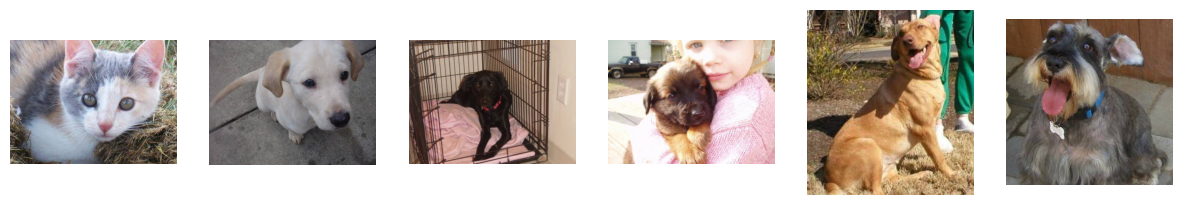

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

# Выбираем случайные изображения
random_files = random.sample(image_files, 6)

# Отображаем изображения
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for ax, img_path in zip(axes, random_files):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis("off")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

data_dir = "./train"
img_size = (150, 150)
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
import os

data_dir = "./train"
print("Содержимое папки train:", os.listdir(data_dir)[:10])


Содержимое папки train: ['cat.10520.jpg', 'dog.6901.jpg', 'dog.2926.jpg', 'cat.8255.jpg', 'cat.11308.jpg', 'cat.7625.jpg', 'cat.11907.jpg', 'dog.4655.jpg', 'cat.2895.jpg', 'cat.3020.jpg']


In [ ]:
import shutil

os.makedirs("train/cats", exist_ok=True)
os.makedirs("train/dogs", exist_ok=True)

for filename in os.listdir("train"):
    if filename.startswith("cat"):
        shutil.move(f"train/{filename}", "train/cats/")
    elif filename.startswith("dog"):
        shutil.move(f"train/{filename}", "train/dogs/")

print("Файлы разложены по папкам!")


Файлы разложены по папкам!


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1345s 2s/step - accuracy: 0.5513 - loss: 0.6854 - val_accuracy: 0.6418 - val_loss: 0.6280
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1345s 2s/step - accuracy: 0.6612 - loss: 0.6144 - val_accuracy: 0.7338 - val_loss: 0.5394
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1333s 2s/step - accuracy: 0.7238 - loss: 0.5511 - val_accuracy: 0.7488 - val_loss: 0.5144
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1316s 2s/step - accuracy: 0.7489 - loss: 0.5110 - val_accuracy: 0.7274 - val_loss: 0.5375
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1314s 2s/step - accuracy: 0.7659 - loss: 0.4889 - val_accuracy: 0.7600 - val_loss: 0.4957
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1324s 2s/step - accuracy: 0.7747 - loss: 0.4627 - val_accuracy: 0.7924 - val_loss: 0.4515
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1328s 2s/step - accuracy: 0.7899 - loss: 0.4491 - val_accuracy: 0.8170 - val_loss: 0.4139
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1325s 2s/step - accuracy: 0.8077 - loss: 0.4200 - 

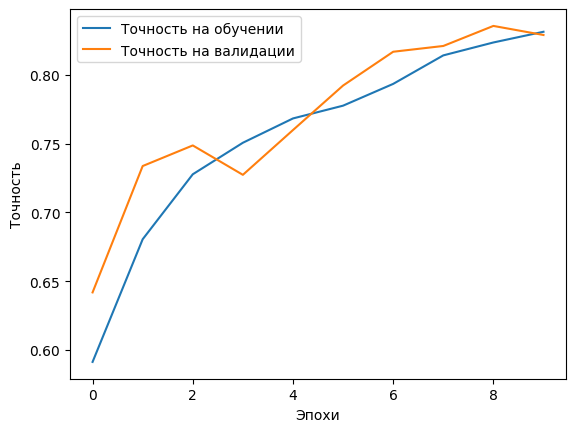

In [ ]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
0.0962919


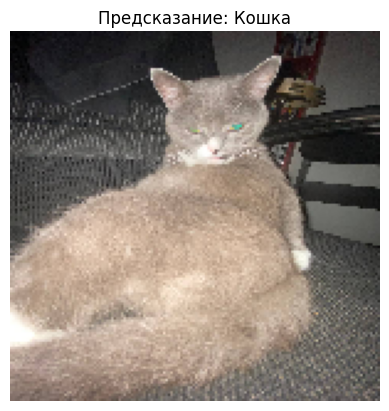

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path = 'check.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

plt.imshow(img)
plt.axis("off")
print(prediction[0][0])
if prediction[0][0] > 0.5:
    label = "Собака"
else:
    label = "Кошка"
plt.title(f"Предсказание: {label}")
plt.show()
